In [31]:
import pandas as pd 
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [32]:
train_df = pd.read_csv("./Dataset/train.csv")
test_df = pd.read_csv("./Dataset/test.csv")

In [33]:
train_df_c = train_df.copy()
test_df_c = test_df.copy()

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6548 entries, 0 to 6547
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Student ID                      6548 non-null   object 
 1   Age                             6456 non-null   float64
 2   Gender                          6548 non-null   object 
 3   Home Region                     6546 non-null   object 
 4   Home City                       6546 non-null   object 
 5   Program ID                      6548 non-null   object 
 6   Program Main Category Code      6548 non-null   object 
 7   Program Sub Category Code       5613 non-null   object 
 8   Technology Type                 3566 non-null   object 
 9   Program Skill Level             4902 non-null   object 
 10  Program Presentation Method     6548 non-null   object 
 11  Program Start Date              6548 non-null   object 
 12  Program End Date                65

# Feature Engieerning

In [35]:
# First feature is is gpa_grade
# in gpa system of 5 the grading is as follows 
# 2.00- 2.74 Acceptable
# 2.75 - 3.74 Good
# 3.75 - 4.49 Very Good
# 4.5 - 5 Excellent

# in gpa system of 4 the grading is as follows 
# 1.00- 1.74 Acceptable
# 1.75 - 2.74 Good
# 2.75 - 3.49 Very Good
# 3.5 - 4 Excellent



In [36]:
def classify_gpa(score, system):
    if system == 5:
        if 2.00 <= score <= 2.74:
            return "Acceptable"
        elif 2.75 <= score <= 3.74:
            return "Good"
        elif 3.75 <= score <= 4.49:
            return "Very Good"
        elif 4.5 <= score <= 5.00:
            return "Excellent"
        else:
            return "Not Applicable"
    elif system == 4:
        if 1.00 <= score <= 1.74:
            return "Acceptable"
        elif 1.75 <= score <= 2.74:
            return "Good"
        elif 2.75 <= score <= 3.49:
            return "Very Good"
        elif 3.5 <= score <= 4.00:
            return "Excellent"
        else:
            return "Not Applicable"
    else:
        return "Unknown System"

train_df_c['GPA_Grade'] = train_df_c.apply(lambda x: classify_gpa(x['University Degree Score'], x['University Degree Score System']), axis=1)

train_df_c[['University Degree Score', 'University Degree Score System', 'GPA_Grade']].head()


,University Degree Score,University Degree Score System,GPA_Grade
0,2.44,4.0,Good
1,5.00,5.0,Excellent
2,3.50,5.0,Good
3,3.55,5.0,Good
4,4.00,5.0,Very Good


## How ***far*** each city is from riyadh is
## that could play a big factor

In [37]:
unq_cites=train_df["Home City"].unique()
len(unq_cites)

93

In [38]:
# Split the list into two halves
half = len(unq_cites) // 2
first_half = unq_cites[:half]
second_half = unq_cites[half:]

# Write the first half to a file
with open('cities_1.txt', 'w', encoding='utf-8') as f:
    for city in first_half:
        f.write(str(city) + '\n')

# Write the second half to a file
with open('cities_2.txt', 'w', encoding='utf-8') as f:
    for city in second_half:
        f.write(str(city) + '\n')

# Creating a dict with the distance to riyadh

In [39]:
# Let's create a dictionary with two keys: "cities" and "distances", where each key corresponds to a list.
cities_distance = {
    "cities": [
        "الرياض", "خميس مشيط", "حفر الباطن", "جدة", "نجران",
        "مكة المكرمة", "ينبع", "المدينة المنورة", "الهفوف", "بريدة",
        "تبوك", "الأحساء", "الجبيل", "عرعر",
        "أبها", "أبو عريش", "الدمام", "الطائف", "الباحة",
        "أحد المسارحة", "حائل", "الدلم", "القطيف", "الدرعية",
        "جيزان",  "الخبر", "المجمعة", "الخرج",
        "الظهران", "الدوادمي", "المزاحمية", "عنيزة", "القنفذة",
        "الليث", "شرورة", "الرس", "صامطة", "شقراء",
        "سيهات", "صفوى", "سكاكا", "البدائع", "رابغ", "رفحاء"
    ],
    "distances": [
        0, 822.50, 422.67, 849.76, 838.30,
        793.92, 879.45, 720.19, 383.63, 330.55,
        1089.64, 286.11, 390.41, 895.48,
        842.43, 947.89, 389.73, 749.34, 750.82,
        830.20, 592.76, 114, 389.83, 17.01,
        842.85, 393.04, 192.60, 85.33,
        387.14, 237.85, 50.13, 315.70, 849,
        832.22, 802.25, 409, 981.68, 160.07,
        387.74, 387.62, 872.30, 331.26, 809.47, 635.88
    ]
}



# Convert the dictionary to a DataFrame
df_cities_distance = pd.DataFrame(cities_distance)

df_cities_distance


,cities,distances
0,الرياض,0.00
1,خميس مشيط,822.50
2,حفر الباطن,422.67
3,جدة,849.76
4,نجران,838.30
5,مكة المكرمة,793.92
6,ينبع,879.45
7,المدينة المنورة,720.19
8,الهفوف,383.63
9,بريدة,330.55


In [40]:
import pandas as pd

# Your original data
cities_1 = ['بيشة', 'محايل', 'المذنب', 'الخفجي', 'رأس تنورة', 'ضمد', 'القريات', 'حوطة بني تميم', 'ضبا', 'مهد الذهب', 'بارق', 'بيش', 'دومة الجندل', 'صبيا', 'العرضيات', 'الحناكية', 'سراة عبيدة', 'أحد رفيدة', 'تربة', 'العلا', 'الحريملاء', 'بلجرشي', 'بقيق', 'القرى', 'رجال ألمع', 'المجاردة', 'وادي الدواسر', 'وادي الفرع', 'محايل عسير', 'الزلفي', 'بدر', 'تثليت', 'عنك', 'البكيرية', 'طريف', 'بني حسن', 'رياض الخبراء', 'طبرجل', 'ثادق', 'الجموم', 'الغاط', 'تيماء', 'ظهران الجنوب', 'أملج', 'ابها', 'الدرب', 'بحرة']
distances_1 = [672.65, 390.1, 284.82, 450.32, 403.6, 936.61, 850.27, 89.49, 1140.38, 608.47, 19.43, 774.62, 883.95, 938.15, 17.9, 626.83, 823.43, 824.88, 649.55, 904.66, 77.5, 756.95, 390.94, 349.8, 856.22, 794.9, 845.47, 509.48, 954.17, 262.24, 812.27, 661.43, 387.84, 357.35, 897.82, 762.45, 350.45, 14.6, 108.64, 794.73, 231.97, 879.41, 848.66, 949.86, 842.43, 899.74, 829.66]

# New data
cities_2 = ["الرياض", "خميس مشيط", "حفر الباطن", "جدة", "نجران", "مكة المكرمة", "ينبع", "المدينة المنورة", "الهفوف", "بريدة", "تبوك", "الأحساء", "الجبيل", "عرعر", "أبها", "أبو عريش", "الدمام", "الطائف", "الباحة", "أحد المسارحة", "حائل", "الدلم", "القطيف", "الدرعية", "جيزان", "الخبر", "المجمعة", "الخرج", "الظهران", "الدوادمي", "المزاحمية", "عنيزة", "القنفذة", "الليث", "شرورة", "الرس", "صامطة", "شقراء", "سيهات", "صفوى", "سكاكا", "البدائع", "رابغ", "رفحاء"]
distances_2 = [0, 822.50, 422.67, 849.76, 838.30, 793.92, 879.45, 720.19, 383.63, 330.55, 1089.64, 286.11, 390.41, 895.48, 842.43, 947.89, 389.73, 749.34, 750.82, 830.20, 592.76, 114, 389.83, 17.01, 842.85, 393.04, 192.60, 85.33, 387.14, 237.85, 50.13, 315.70, 849, 832.22, 802.25, 409, 981.68, 160.07, 387.74, 387.62, 872.30, 331.26, 809.47, 635.88]

# Combine the two lists
cities = cities_1 + cities_2
distances = distances_1 + distances_2

# Create the DataFrame
df_cities_distance = pd.DataFrame({'City': cities, 'Distance': distances})

df_cities_distance

,City,Distance
0,بيشة,672.65
1,محايل,390.10
2,المذنب,284.82
3,الخفجي,450.32
4,رأس تنورة,403.60
...,...,...
86,صفوى,387.62
87,سكاكا,872.30
88,البدائع,331.26
89,رابغ,809.47


In [41]:
# Merge
distance_map = df_cities_distance.set_index('City')['Distance'].to_dict()
train_df_c['distance'] = train_df_c['Home City'].map(lambda x: distance_map.get(x))


In [42]:
train_df_c[train_df_c['Home City'] == "حوطة بني تميم"]

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,Education Speaciality,College,University Degree Score,University Degree Score System,Employment Status,Job Type,Still Working,Y,GPA_Grade,distance
1926,36ed263b-22fb-491d-8cc3-509f0ab9a5d0,22.0,أنثى,منطقة الرياض,حوطة بني تميم,9f5abff4-6dc1-4ac0-8769-7dad61963b6d,CAUF,NaN,NaN,مبتدئ,...,نظم المعلومات,NaN,4.99,5.0,غير موظف,NaN,NaN,0,Excellent,89.49


# Encoding 

In [43]:
train_df_c.columns

Index(['Student ID', 'Age', 'Gender', 'Home Region', 'Home City', 'Program ID',
       'Program Main Category Code', 'Program Sub Category Code',
       'Technology Type', 'Program Skill Level', 'Program Presentation Method',
       'Program Start Date', 'Program End Date', 'Program Days',
       'Completed Degree', 'Level of Education', 'Education Speaciality',
       'College', 'University Degree Score', 'University Degree Score System',
       'Employment Status', 'Job Type', 'Still Working', 'Y', 'GPA_Grade',
       'distance'],
      dtype='object')

In [44]:
train_df_c['distance']

0         0.00
1       822.50
2         0.00
3         0.00
4         0.00
         ...  
6543      0.00
6544    330.55
6545      0.00
6546      0.00
6547      0.00
Name: distance, Length: 6548, dtype: float64

In [45]:
le = LabelEncoder()
categorical_features = ['Gender', 'Home Region', 'Home City', 'Program ID', 
                        'Program Main Category Code', 'Program Sub Category Code', 
                        'Technology Type', 'Program Skill Level', 
                        'Program Presentation Method', 'Completed Degree', 
                        'Level of Education', 'Education Speaciality', 'College', 
                        'Employment Status', 'Job Type','Still Working',"Student ID","GPA_Grade"]

for feature in categorical_features:
    train_df_c[feature] = le.fit_transform(train_df_c[feature])


In [46]:
train_df_c.head()

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,Education Speaciality,College,University Degree Score,University Degree Score System,Employment Status,Job Type,Still Working,Y,GPA_Grade,distance
0,1598,37.0,1,4,23,65,6,6,3,3,...,819,9,2.44,4.0,3,4,2,0,2,0.0
1,97,21.0,1,10,62,180,1,9,3,2,...,312,6,5.00,5.0,1,4,2,0,1,822.5
2,1126,24.0,1,4,23,197,1,11,3,2,...,127,9,3.50,5.0,4,4,2,0,2,0.0
3,443,23.0,1,4,23,43,9,10,3,3,...,575,9,3.55,5.0,0,4,2,0,2,0.0
4,3089,23.0,1,4,23,188,2,9,0,2,...,747,8,4.00,5.0,6,4,2,0,5,0.0


# Analysis after encoding

In [47]:
train_df_c

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,Education Speaciality,College,University Degree Score,University Degree Score System,Employment Status,Job Type,Still Working,Y,GPA_Grade,distance
0,1598,37.0,1,4,23,65,6,6,3,3,...,819,9,2.44,4.0,3,4,2,0,2,0.00
1,97,21.0,1,10,62,180,1,9,3,2,...,312,6,5.00,5.0,1,4,2,0,1,822.50
2,1126,24.0,1,4,23,197,1,11,3,2,...,127,9,3.50,5.0,4,4,2,0,2,0.00
3,443,23.0,1,4,23,43,9,10,3,3,...,575,9,3.55,5.0,0,4,2,0,2,0.00
4,3089,23.0,1,4,23,188,2,9,0,2,...,747,8,4.00,5.0,6,4,2,0,5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6543,4166,31.0,0,4,23,76,2,9,3,3,...,487,8,4.40,5.0,6,4,2,0,5,0.00
6544,1109,27.0,0,5,45,204,6,6,3,0,...,638,9,4.46,5.0,4,4,2,0,5,330.55
6545,5097,24.0,0,4,23,2,6,6,0,0,...,738,8,4.93,5.0,4,3,1,1,1,0.00
6546,1532,25.0,1,4,23,134,6,6,3,2,...,487,8,4.00,4.0,3,0,0,0,1,0.00


<Axes: >

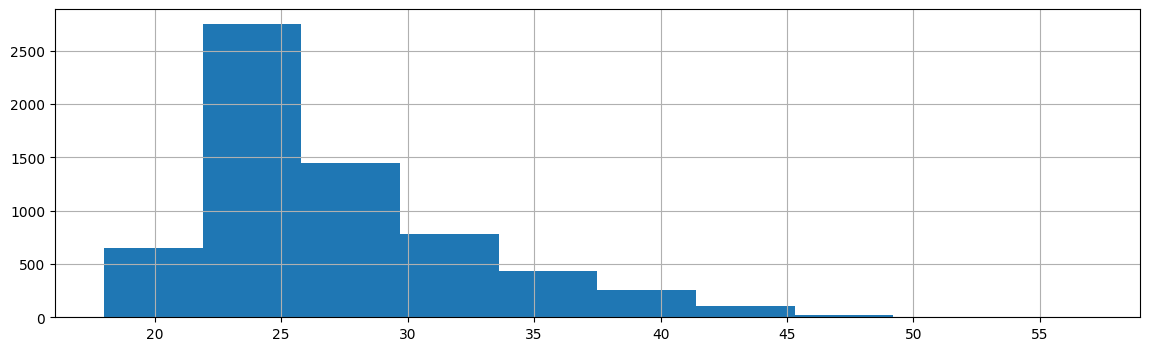

In [48]:
train_df['Age'].hist(figsize=(14,4))

# Splitting Dataset

## Split train data into validation and training datasets

In [49]:
X = train_df_c.drop(["Y","Program End Date","Program Start Date"],axis=1)
y = train_df_c["Y"]


In [50]:
X.head()

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,Level of Education,Education Speaciality,College,University Degree Score,University Degree Score System,Employment Status,Job Type,Still Working,GPA_Grade,distance
0,1598,37.0,1,4,23,65,6,6,3,3,...,0,819,9,2.44,4.0,3,4,2,2,0.0
1,97,21.0,1,10,62,180,1,9,3,2,...,0,312,6,5.00,5.0,1,4,2,1,822.5
2,1126,24.0,1,4,23,197,1,11,3,2,...,0,127,9,3.50,5.0,4,4,2,2,0.0
3,443,23.0,1,4,23,43,9,10,3,3,...,0,575,9,3.55,5.0,0,4,2,2,0.0
4,3089,23.0,1,4,23,188,2,9,0,2,...,0,747,8,4.00,5.0,6,4,2,5,0.0


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
X_train.shape

(5238, 23)

In [53]:
X_test.shape

(1310, 23)

# Modeling

In [55]:
from xgboost import XGBClassifier

xg = XGBClassifier(objective ='binary:logistic', learning_rate = 1,
                          max_depth = 2, n_estimators = 2)



In [56]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

xg.fit(X_train, y_train)
preds = xg.predict(X_test)

accuracy = accuracy_score(y_test, preds)

accuracy_percentage = accuracy * 100
f1 = f1_score(y_test, preds)
recall = recall_score(y_test, preds)
precision = precision_score(y_test, preds)
accuracy = accuracy_score(y_test, preds)

print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Accuracy: {accuracy:.2f}")



F1 Score: 0.64
Recall: 0.70
Precision: 0.60
Accuracy: 0.89


In [57]:
train_df_c['Y'].value_counts()

Y
0    5509
1    1039
Name: count, dtype: int64

# light gradeint boosting machine

# Fine tuning


In [58]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
lgbm = lgb.LGBMClassifier()


In [59]:
# # Define the parameter grid
# param_grid = {
#     'max_depth': [1,2, 3, 5, 7],
#     'num_leaves': [12, 20, 31, 63, 127],
#     'learning_rate': [0.01, 0.1, 1, 2, 2.5],
#     'n_estimators': [20, 50, 100, 200, 300]
# }

# # Create the LightGBM estimator
# lgbm = lgb.LGBMClassifier(objective='binary', metric=['f1','accuracy','recall'])

# # Create the grid search object
# grid_search = GridSearchCV(
#     estimator=lgbm,
#     param_grid=param_grid,
#     cv=5,
#     scoring='f1',
#     n_jobs=-1,
#     verbose=3
# )

# # Fit the grid search object to the data
# grid_search.fit(X_train, y_train)

# # Print the best parameters and score
# print("Best parameters:", grid_search.best_params_)
# print("Best F1 score:", grid_search.best_score_)
